## Обучение без учителя

Ранее мы рассматривали в основном только задачи, где у части данных (тренировочной) была размечена целевая функция (таргет), а для другой части данных (тестовой) таргета нет, и мы хотели его восстановить. Такие задачи (классификация, регрессия, ранжирование), как вы помните, называются **обучением с учителем** (supervised learning).

Давайте посмотрим теперь на задачи, в которых таргета не дано - но все же что-то сопоставить каждому элементу надо. Такие задачи называются обучением без учителя (**unsupervised learning**).

Примеры таких задач:
* кластеризация
* уменьшение размерности
* визуализация
* вложение в пространство (но это не точно)

In [ ]:
!pip install gensim

In [1]:
# Можете в самом начале поставить себе скачиваться вот эти библиотеки, они могут пригодиться:
import cv2
import gensim

C:\Users\Lain\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
# стандартные импорты
import cv2
import gensim
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

C:\Users\Lain\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


## Кластеризация

Сама задача состоит в разделении точек в пространстве на кластеры близко расположенных. Так как вы уже разбирали и даже писали k-Means, давайте просто посмотрим, какие есть способы решить эту задачу.

### Домашнее задание № 1: Уменьшение палитры изображения
Для <a href='https://thumbs.dreamstime.com/x/two-lorikeet-birds-2293918.jpg'> картинки </a> нужно уменьшить число цветов в палитре; для этого нужно выделить кластеры в пространстве RGB, объекты соответствуют пикселям изображения; после выделения кластеров, все пиксели, отнесенные в один кластер, заполняются одним цветом; этот цвет может быть центроидом соответствующего кластера, медианным цветом по кластеру.
Попробуйте различные алгоритмы кластеризации:

* KMeans
* DBSCAN

Можно использовать и другие:
* MeanShift
* AgglomerativeClustering
* Какие угодно, какие сможете найти

Рассмотрите число кластеров K = 2, 3, 10, 20 (в алгоритмах, где есть такой гиперпараметр).

Для различных кластеризаций оцените и сравните потери от уменьшения цветов при помощи метрики 
<a href='http://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.compare_ssim'> SSIM </a>. Какой способ оказался лучшим?

Приведите примеры работы лучшего алгоритма на выбранных вами любых картинках :)



Вот вам вспомогательная функция для считывания и вывода изображений:

In [43]:
!python -m pip install opencv-python

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
import cv2 # нужно поставить себе cv2

def draw_picture(image, bgr=False):
    b, g, r = cv2.split(image) # по умолчанию cv2 почему-то отдает цвета в порядке BGR вместо RGB
    new_image = cv2.merge([r, g, b])
    plt.figure(figsize=(7, 5))
    plt.axis('off')
    plt.imshow(new_image)
    plt.show()

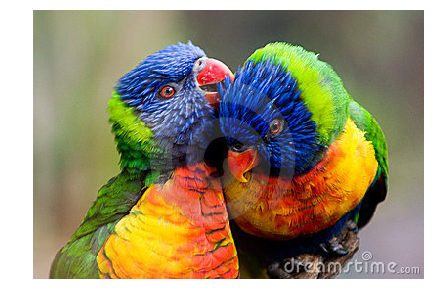

In [70]:
img = cv2.imread('birds.jpg') # считать картинку
draw_picture(img) # нарисовать картинку

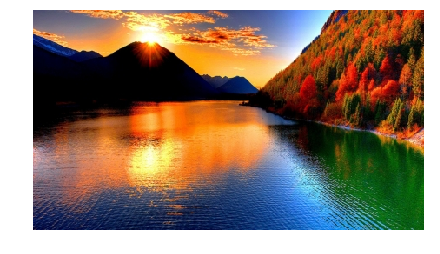

In [64]:
img = cv2.imread('lake.jpg') # считать картинку
draw_picture(img)

In [60]:
def paint_points_and_drow_picture(img,model):
    size = img.shape
    X = np.array(img.reshape([size[0]*size[1],3]))
    y_pred = model.fit_predict(X)
    try:
        centers = model.cluster_centers_
    except:
        centers = find_centers(X,y_pred,len(set(y_pred)))
    for j in range(size[0]*size[1]):
        X[j]= centers[y_pred[j]]
    img_new = X.reshape([size[0],size[1],3])
    draw_picture(img_new)

In [ ]:
def find_centers(X,y,k):
    sums = [np.array([0,0,0]) for i in range(k)]
    nums = [0]*k
    for i in range(len(X)):
        sums[y[i]]+=X[i]
        nums[y[i]]+=1
    for i in range(k):
        sums[i]=sums[i]/nums[i]
    return sums

In [61]:
print(img.shape) # сам img - это обычный трехмерный массив 275 x 400 x 3

(1000, 1600, 3)


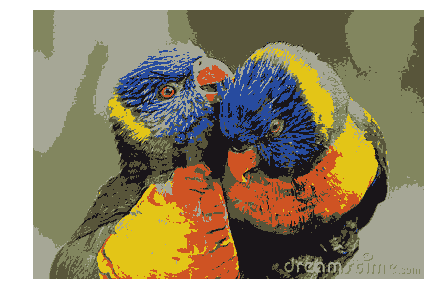

In [82]:
from sklearn.cluster import KMeans
paint_points_and_drow_picture(img,KMeans(n_clusters=7))

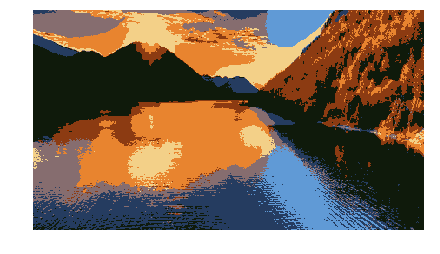

In [65]:
from sklearn.cluster import KMeans
paint_points_and_drow_picture(img,KMeans(n_clusters=7))

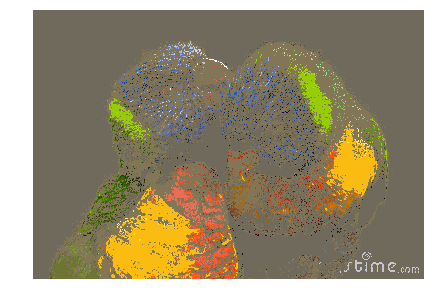

In [81]:
from sklearn.cluster import DBSCAN
paint_points_and_drow_picture(img,DBSCAN(eps=3.5, min_samples=6))
#damn it(((((((((

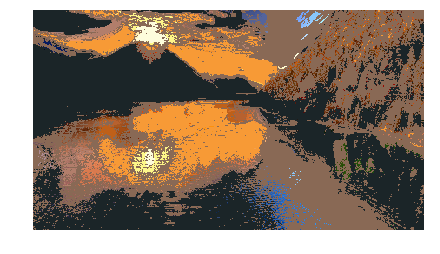

In [69]:
from sklearn.cluster import DBSCAN
paint_points_and_drow_picture(img,DBSCAN(eps=2.6, min_samples=10))

## Уменьшение размерности и визуализация

Обе эти задачи состоят в **сжатии выборки**: нужно перевести точки из N-мерного пространства в M-мерное пространство, где M < N, причем так, чтобы близкие точки остались близкими. То есть хочется значительно уменьшить число признаков, не сильно потеряв (или даже улучшив) их качество.

Для примеров мы будем чаще всего переводить в 2-мерное пространство - это заодно и хороший способ **визуализировать** датасет.

Давайте, например, рассмотрим известный датасет с цифрами.

в некоторых из этих примеров и люди могут ошибиться :)

## Домашнее задание №2: Уменьшение размерности помогает классифицировать лица

Используя методы уменьшения размерности признаков, решите с максимальным **accuracy** задачу классификации лиц знаменитостей (датасет старый, неудивительно, если вы из всех знаменитостей будете знать только Буша и Шварценнегера.

Сами разделите выбору на тренировочную и тестовую части (20% в тестовой). Попробуйте добиться максимального accuracy
* без уменьшения размерности
* с уменьшением размерности

Возможно без уменьшения размерности у вас даже просто не получится дождаться времени работы на 11750 признаках :).

Нарисуйте несколько лиц, на которых ваш алгоритм ошибся, подпишите правильный ответ и ваш ответ.

Напишите, каким алгоритмом вы воспользовались (PCA или TSNE), почему не другим? Обоснуйте ответ.

Скачивание данных и вспомогательная функция визуализации лиц уже есть:

In [2]:
import cv2
import gensim
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from matplotlib.colors import Normalize
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression

C:\Users\Lain\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [3]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=30, resize=1.0) # эту строчку менять нельзя, ресайзить нельзя

In [4]:
X = lfw_people.data
y = lfw_people.target

In [5]:
X.shape # 2370 лиц, каждый из них представляется вектором размера 11750

(976, 11750)

In [6]:
y.shape

(976,)

In [7]:
round(X.shape[0]*0.2)

195

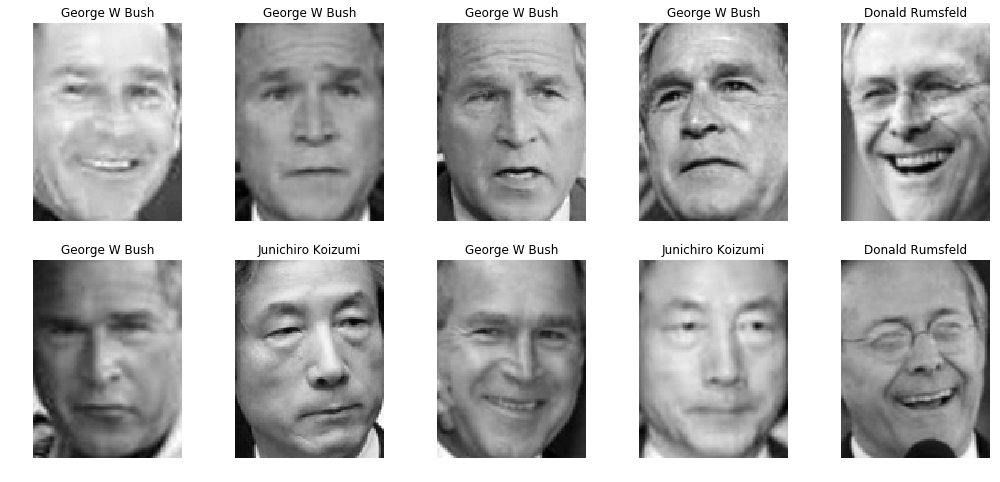

In [8]:
def plot_image(image_id):
    # функция рисует изображение номер image_id
    plt.title(lfw_people['target_names'][y[image_id]])
    plt.imshow(255 - lfw_people['images'][image_id], cmap=plt.cm.gray_r, interpolation='nearest')
    
def plot_grid(image_ids, nrows, ncols):
    # функция рисует изображения с id равными image_ids
    # в nrows рядов и ncols столбцов
    fig = plt.gcf()
    fig.set_size_inches(17.5, 8)
    for index, example_id in enumerate(image_ids):
        plt.subplot(nrows, ncols, index + 1)
        plot_image(example_id)
        plt.axis('off')

plot_grid(range(10), nrows=2, ncols=5)

In [9]:
from sklearn.decomposition import PCA
from matplotlib.colors import Normalize

pca = PCA(n_components=53)
# Применим PCA к нашим векторам с цифрами
X_pca_53 = pca.fit(X).transform(X) # fit - обучение, transform - применение
X_pca_53

array([[-1.5313818e+03,  6.5435724e+02,  3.6801770e+02, ...,
         2.0248404e+01,  8.0149460e+01, -1.3092574e+02],
       [ 6.4256854e+02,  1.2064456e+02,  1.1310465e+03, ...,
        -2.1203975e+02, -6.3876369e+01, -4.9340923e+01],
       [-1.4126223e+03, -2.8179895e+03, -4.2330051e+01, ...,
        -3.4591660e+02,  1.9623238e+01,  9.7768478e+00],
       ...,
       [-3.2118396e+02,  2.0192866e+03,  4.5618173e+02, ...,
         3.9586389e+02, -1.7411456e+02,  1.8690254e+02],
       [ 3.4224231e+03, -7.0284180e+02,  1.4807260e+02, ...,
        -1.4495935e+02, -4.4272418e+02,  2.8812372e+02],
       [-2.2796021e+02, -2.0618979e+02, -3.0880585e+02, ...,
         4.7213791e+01,  1.3637648e+01,  1.4671688e+00]], dtype=float32)

In [49]:
pca = PCA(n_components=4)

X_pca_4 = pca.fit(X).transform(X)
X_pca_4

array([[-1531.3827  ,   654.3581  ,   368.01688 ,  -385.57724 ],
       [  642.56885 ,   120.64583 ,  1131.0455  ,   406.76837 ],
       [-1412.6235  , -2817.9897  ,   -42.32644 ,   -37.997025],
       ...,
       [ -321.1837  ,  2019.287   ,   456.17865 ,  1081.3788  ],
       [ 3422.4246  ,  -702.84247 ,   148.07281 ,   675.6962  ],
       [ -227.96072 ,  -206.19012 ,  -308.8041  , -2270.8857  ]],
      dtype=float32)

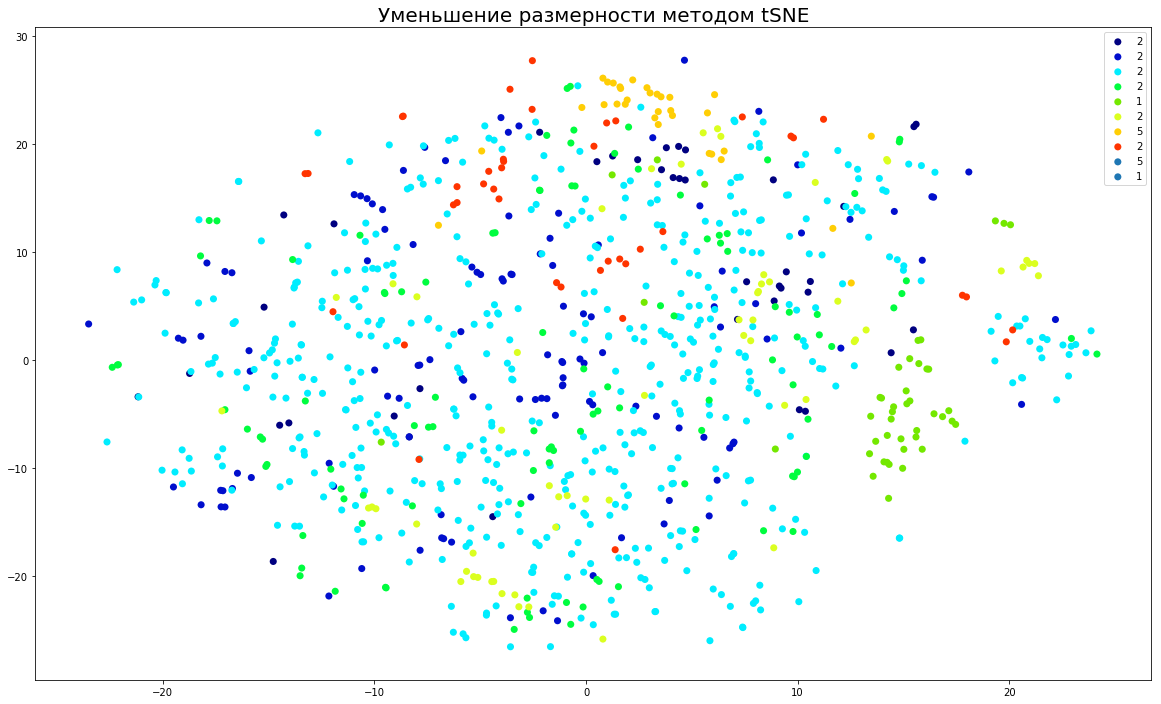

In [15]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, n_iter=400)

X_tsne_2 = tsne.fit_transform(X)
plt.figure(figsize=(20, 12))
for d in range(10):
    norm = Normalize(vmin=0, vmax=10)
    color = plt.cm.gist_ncar(norm(d))
    plt.scatter(X_tsne_2[:, 0][y == d],
                X_tsne_2[:, 1][y == d],
                c=[color] * len(X_tsne_2[:, 0][y == d]), label=y[d], edgecolor='none', s=50)
plt.title(u"Уменьшение размерности методом tSNE", fontsize=20)
plt.legend()

In [17]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression

# будем применять, например, логистическую регрессию
print('accuracy for raw data is {}'.format(cross_val_score(LogisticRegression(),
                                                           X, y,
                                                           scoring='accuracy').mean()))
print('accuracy for data transormed by PCA-53D is {}'.format(cross_val_score(LogisticRegression(),
                                                                            X_pca_53, y,
                                                                            scoring='accuracy').mean()))
print('accuracy for data transormed by tSNE-2D is {}'.format(cross_val_score(LogisticRegression(),
                                                                             X_tsne_2, y,
                                                                             scoring='accuracy').mean()))

accuracy for raw data is 0.8525142902993257
accuracy for data transormed by PCA-54D is 0.836096400774624
accuracy for data transormed by tSNE-2D is 0.5379604905868821


In [ ]:
#accuracy for raw data is better(...

In [20]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
tsne3 = TSNE(n_components=3, n_iter=400)

X_tsne_3 = tsne3.fit_transform(X)
plt.figure(figsize=(20, 12))
print('accuracy for data transormed by tSNE-3D is {}'.format(cross_val_score(LogisticRegression(),
                                                                             X_tsne_3, y,
                                                                             scoring='accuracy').mean()))
#видно, что TSne не справляется

accuracy for data transormed by tSNE-3D is 0.5348486657998462


<Figure size 1440x864 with 0 Axes>

accuracy for data transormed by PCA-1 is 0.5533175474745259
accuracy for data transormed by PCA-2 is 0.5502435957370282
accuracy for data transormed by PCA-3 is 0.5502435957370282
accuracy for data transormed by PCA-4 is 0.5625142314373264
accuracy for data transormed by PCA-5 is 0.5655881831748241
accuracy for data transormed by PCA-6 is 0.587087373512534
accuracy for data transormed by PCA-7 is 0.5952548631628907
accuracy for data transormed by PCA-8 is 0.6311701316247245
accuracy for data transormed by PCA-9 is 0.6332213561246994
accuracy for data transormed by PCA-10 is 0.6393627925247739
accuracy for data transormed by PCA-11 is 0.6393378536250781
accuracy for data transormed by PCA-12 is 0.6352790476995956
accuracy for data transormed by PCA-13 is 0.6547196170624207
accuracy for data transormed by PCA-14 is 0.6772784782872026
accuracy for data transormed by PCA-15 is 0.7018640898122581
accuracy for data transormed by PCA-16 is 0.7182376392125008
accuracy for data transormed by PC

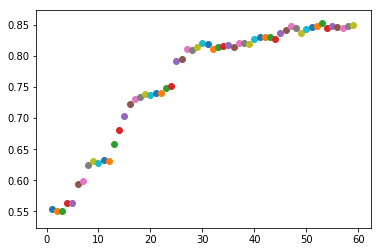

In [21]:
for dim in range(1,60,1):
    pca = PCA(n_components=dim)
    X_pca = pca.fit(X).transform(X)
    plt.scatter(dim,cross_val_score(LogisticRegression(),X_pca, y,scoring='accuracy',cv=10).mean())
    print('accuracy for data transormed by PCA-{} is {}'.format(dim,cross_val_score(LogisticRegression(),X_pca, y,scoring='accuracy').mean()))
plt.show()

In [ ]:
# 54 or 53 are the best

In [32]:
from sklearn.utils import shuffle

lfw_people = pd.Series(lfw_people)

In [38]:
lfw_people = (shuffle(lfw_people.T)).T

In [39]:
#now lets seperate everything to train and test data...
X_test = X[0:round(X.shape[0]*0.2)]
y_test = y[0:round(X.shape[0]*0.2)]
X_train = X[0:round(X.shape[0]*0.2)]
y_train = y[0:round(X.shape[0]*0.2)]

In [40]:
pca_train = PCA(n_components=54)
# Применим PCA к нашим векторам с цифрами
X_pca_train = pca_train.fit(X_train).transform(X_train) # fit - обучение, transform - применение
X_pca_train

array([[-1.7267195e+03, -3.9355457e+02, -3.7924228e+02, ...,
        -2.0006836e+01, -1.3026746e+02,  1.0717032e+02],
       [ 3.3612671e+02, -1.6737587e+02, -1.0532719e+03, ...,
        -6.9813202e+01, -9.9108181e+00, -6.1408821e+01],
       [-9.7174719e+02,  2.9884497e+03,  2.1717911e+00, ...,
         2.7646625e+02, -9.5837387e+01, -5.0659691e+01],
       ...,
       [ 8.3913300e+01, -6.0955493e+02,  3.1580379e+01, ...,
         2.2034584e+01, -2.3824899e+02,  5.8678150e+00],
       [-6.7026544e+02, -1.5008269e+03, -3.5703827e+02, ...,
         5.8264217e+01,  2.6825372e+02, -3.1436990e+02],
       [-3.8275566e+03, -1.9753484e+03, -8.5603882e+02, ...,
        -4.2408224e+02, -7.8535767e+01, -2.0020593e+02]], dtype=float32)

In [48]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
errors = (y_pred != y_train)

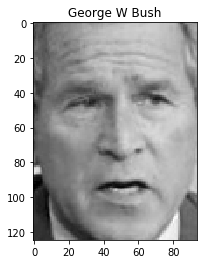

In [52]:
y_pred = [0]*len(y_pred)
for i in range (len(y_pred)):
    if y_pred[i]!=y_test[i]:
        plot_image(i)
plot_image(2)

In [47]:
print('accuracy for raw data is {}'.format(cross_val_score(model,
                                                           X_test, y_train,
                                                           scoring='accuracy').mean()))

accuracy for raw data is 0.7231572033279813
